# Random Forest

## Table of Contents
- [1 - Fundamentals](#1)
    - [1.1 - Characteristics](#1.1)
    - [1.2 - Limitations of Q-Learning with Q-Tables](#1.1)
    - [1.3 - Deep-Q-Learning](#1.2)
    - [1.4 - Deep-Q-Network](#1.3)
    - [1.5 - Experience Replay](#1.4)
    - [1.6 - Target Network](#1.5)
    - [1.7 - When to use Deep Q-Learning](#1.6)

<a name='1'></a>
# 1 - Fundamentals

<a name='1.1'></a>
## 1.1 - Characteristics

A Random Forest is a classification and regression method consisting of several uncorrelated decision trees. 

<a name='1.2'></a>
## 1.2 - Limitations of Q-Learning with Q-Tables

The Q-learning algorithm do a pretty decent job in relatively small state spaces, but it's performance will drop-off considerably when we work in more complex and sophisticated environments. 

Think about a video game where a player has a large environment to roam around in. Each state in the environment would be represented by a set of pixels, and the agent may be able to take serveral actions from each state. The iterative process of computing and updating Q-values for each state-action pair in a large state space becomes computationally inefficient and perhaps infeasible due to the computational resources and time this may take.

So what can we do when we want to manage more sophisticated environments with large state spaces? Well, rather than using value iteration to directly compute Q-values and find the optimal Q-function, we instead use a function approximation to estimate the optimal Q-function.

<a name='2'></a>
# 2 - Implementation

<a name='2.1'></a>
## 2.1 - Scikit-learn (classification)

In this section we will use a Random Forest algorithm for a classification problem. We will implemented the algorithm using the scikit-learn library and the iris plants dataset, provided by scikit-learn.

In [13]:
# Import all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [28]:
# Load dataset, define features and target as pandas dataframe
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target
X = iris_df.drop(['species'], axis = 1)
y = iris_df['species']

In [29]:
# Split dataset in trainingset and testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [30]:
# Inspect trainingset and testset
print(f"Trainingset: {X_train.shape}, {y_train.shape}")
print(f"Testset: {X_test.shape}, {y_test.shape}")

Trainingset: (120, 4), (120,)
Testset: (30, 4), (30,)


In [56]:
# Define model (sklearn website for detailed documentation)
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                       min_weight_fraction_leaf=0.0, max_features=None, random_state=13, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [58]:
# Train model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

In [59]:
# Evaluate model with testset
predictions = model.predict(X_test)

In [42]:
# Calculate accuracy
accuracy = accuracy_score(predictions, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9333333333333333


In [67]:
# Output some model insights
print(f"Feature names: {model.feature_names_in_}") # output feature names
print(f"Feature importance: {model.feature_importances_}") # output feature importances

Feature names: ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
Feature importance: [0.01251826 0.02503651 0.06718963 0.89525561]


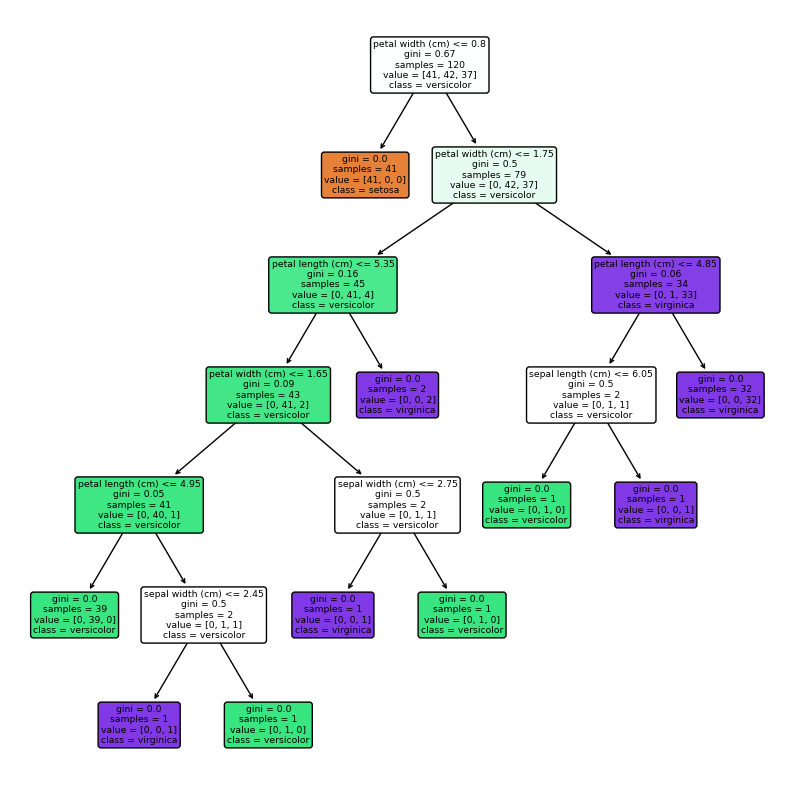

In [84]:
# Visualize random forest
fig = plt.figure(figsize=(10, 10))
tree.plot_tree(random_forest, feature_names=iris.feature_names,
              class_names=iris.target_names, filled=True, impurity=True, node_ids=False, proportion=False, rounded=True, precision=2)
plt.show()

<a name='2.2'></a>
## 2.2 - Scikit-learn (regression)

In [88]:
# Import all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree

In [94]:
# Load dataset, define features and target as pandas dataframe
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
diabetes_df['disease_progression'] = diabetes.target
X = diabetes_df.drop(['disease_progression'], axis=1)
y = diabetes_df['disease_progression']

In [95]:
# Split dataset in trainingset and testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [96]:
# Inspect trainingset and testset
print(f"Trainingset: {X_train.shape}, {y_train.shape}")
print(f"Testset: {X_test.shape}, {y_test.shape}")

Trainingset: (353, 10), (353,)
Testset: (89, 10), (89,)


In [ ]:
# Define model (sklearn website for detailed documentation)
model = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                              min_weight_fraction_leaf=0.0, max_features=None, random_state=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
                              ccp_alpha=0.0)